<h1> Proyecto Final </h1><br>
María Ximena Acuña -  Andrés Felipe Tocaruncho

<h2> Problema 1 - LP </h2>

<h3> Variante 1 </h3>
Suponga que se planea contruir una nueva cadena de tiendas en una ciudad dada, usted tiene identificado una serie de ubicaciones potenciales en diferentes barrios. Si usted quiere construir exactamente k tiendas,  ¿dónde debería localizarlas de forma que minimice la distancia promedio de los clientes? 

<h4> Algoritmo propuesto </h4>

In [34]:
import itertools 

In [44]:
def punto1A(nombre_archivo, n):
    dist = []
    ids = []
    nombres = []
    
    archivo = open(nombre_archivo, "r")
    
    k = int(archivo.readline())
    
    for i in range (1,n):
        li = archivo.readline()
        linea = li.split(" ")
        nombres.append(linea[0])
        ids.append(len(nombres)-1)
        dist.append([])
        for j in range(1,n):
            dist[len(ids)-1].append(int(linea[j]))
    
    comb = itertools.combinations(ids, k)
    lista_comb = [list(x) for x in comb]
    
    dist = floyd_warshall(dist)
    
    menor = 100000
    abrir = []
    for i in range(len(lista_comb)):        
        cost = costo(lista_comb[i], len(ids), dist)
        if (cost < menor):
            menor = cost
            abrir = lista_comb[i]
            
    output = open(nombre_archivo.replace("input", "output"), "w")
    
    output.write(str(menor) + "\n")
    
    for a in abrir:
        output.write(nombres[a] + ",")
        
    print "Se abren los barrios ", abrir, "con costo ", menor
        
def costo(combinacion, n, dist):
    total = 0
    for i in range(n):
        menor = 100000
        for j in combinacion:
            if (dist[j][i] < menor):
                menor = dist[j][i]
        total = total + menor
    return total

def floyd_warshall(dist):    
    for i in range(len(dist)):
        for j in range(len(dist)):
            for k in range(len(dist)):
                if(dist[j][i]+dist[i][k]<dist[j][k]):
                    dist[j][k] = dist[j][i]+dist[i][k]
    return dist

In [45]:
punto1A("input_n5_k3", 5)

Se abren los barrios  [0, 1, 2] con costo  2


<h4> Análisis del tiempo de ejecución </h4>

In [46]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Número de pasos =", self.steps

def acct_punto1A(nombre_archivo, acct, n):
    dist = []
    ids = []
    nombres = []
    
    archivo = open(nombre_archivo, "r"); acct.count()
    
    k = int(archivo.readline()); acct.count()
    
    for i in range (1,n):
        li = archivo.readline(); acct.count()
        linea = li.split(" "); acct.count()
        nombres.append(linea[0]); acct.count()
        ids.append(len(nombres)-1); acct.count()
        dist.append([]); acct.count()
        for j in range(1,n):
            dist[len(ids)-1].append(int(linea[j])); acct.count()
    
    comb = itertools.combinations(ids, k); acct.count()
    lista_comb = [list(x) for x in comb]; acct.count()
    
    dist = floyd_warshall(dist)
    
    menor = 100000
    abrir = []
    for i in range(len(lista_comb)):        
        cost = costo(lista_comb[i], len(ids), dist); acct.count()
        if (cost < menor):
            menor = cost; acct.count()
            abrir = lista_comb[i]; acct.count()
            
    output = open(nombre_archivo.replace("input", "output"), "w")
    
    output.write(str(menor) + "\n")
    
    for a in abrir:
        output.write(nombres[a] + ",")
        
    print "Se abren los barrios ", abrir, "con costo ", menor
        
def costo(combinacion, n, dist):
    total = 0
    for i in range(n):
        menor = 100000
        for j in combinacion:
            if (dist[j][i] < menor):
                menor = dist[j][i]; acct.count()
        total = total + menor; acct.count()
    return total

def floyd_warshall(dist):    
    for i in range(len(dist)):
        for j in range(len(dist)):
            for k in range(len(dist)):
                if(dist[j][i]+dist[i][k]<dist[j][k]):
                    dist[j][k] = dist[j][i]+dist[i][k]; acct.count()
    return dist

In [47]:
acct = Counter()
acct_punto1A("input_n5_k3", acct, 5)
acct.print_steps()

Se abren los barrios  [0, 1, 2] con costo  2
Número de pasos = 95


<h4> Análisis experimental </h4>
Se utilizará la misma entrada, cambiando el n desde 4 hasta 10.

In [48]:
def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(4, n+1):
        acct.reset()
        acct_punto1A("input_n10_k3", acct, i)
        results.append(acct.steps)
    return results

print exper_analysis(10)

Se abren los barrios  [0, 1, 2] con costo  0
Se abren los barrios  [0, 1, 2] con costo  12
Se abren los barrios  [0, 2, 4] con costo  27
Se abren los barrios  [0, 2, 4] con costo  45
Se abren los barrios  [0, 3, 5] con costo  58
Se abren los barrios  [0, 3, 5] con costo  72
Se abren los barrios  [0, 3, 5] con costo  92
[31, 46, 70, 96, 133, 174, 224]


In [59]:
import time

def time_analysis(n):
    results = []
    for i in range(4, n+1):
        tic = time.clock()
        punto1A("input_n10_k3", i)
        toc = time.clock()
        results.append((toc-tic)*100000)
    return results

print time_analysis(10)

Se abren los barrios  [0, 1, 2] con costo  0
Se abren los barrios  [0, 1, 2] con costo  12
Se abren los barrios  [0, 2, 4] con costo  27
Se abren los barrios  [0, 2, 4] con costo  45
Se abren los barrios  [0, 3, 5] con costo  58
Se abren los barrios  [0, 3, 5] con costo  72
Se abren los barrios  [0, 3, 5] con costo  92
[189.5000000000202, 76.49999999994606, 130.19999999999143, 90.19999999999584, 138.10000000002987, 214.80000000000388, 328.79999999995135]


In [55]:
import random as rnd
import numpy as np

def teoric_analysis(n):
    results = []
    for i in range(4,n+1):
        l = i*i*np.log(i)
        results.append(l)
    return results

print teoric_analysis(10)

[22.180709777918249, 40.235947810852508, 64.503340892209977, 95.349597303710354, 133.08425866750949, 177.97519076423379, 230.25850929940458]


Se abren los barrios  [0, 1, 2] con costo  0
Se abren los barrios  [0, 1, 2] con costo  12
Se abren los barrios  [0, 2, 4] con costo  27
Se abren los barrios  [0, 2, 4] con costo  45
Se abren los barrios  [0, 3, 5] con costo  58
Se abren los barrios  [0, 3, 5] con costo  72
Se abren los barrios  [0, 3, 5] con costo  92
Se abren los barrios  [0, 1, 2] con costo  0
Se abren los barrios  [0, 1, 2] con costo  12
Se abren los barrios  [0, 2, 4] con costo  27
Se abren los barrios  [0, 2, 4] con costo  45
Se abren los barrios  [0, 3, 5] con costo  58
Se abren los barrios  [0, 3, 5] con costo  72
Se abren los barrios  [0, 3, 5] con costo  92


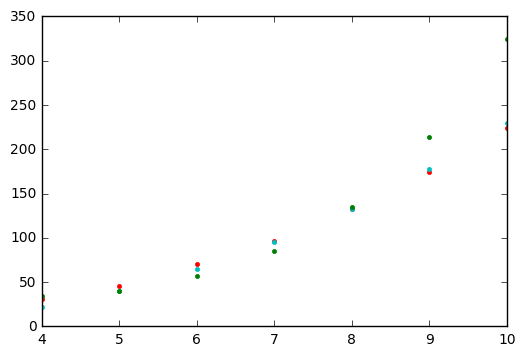

In [60]:
import pylab as pl
%matplotlib inline

pl.clf()
x = np.arange(4,11)
y = np.array(exper_analysis(10))
pl.plot(x, y, 'k.', color ='r')
z = np.array(teoric_analysis(10))
pl.plot(x, z, 'k.', color='c')
w = np.array(time_analysis(10))
pl.plot(x, w, 'k.', color='g')

<h3> Variante 2 </h3>
Si en lugar usted desea construir una cantidad variable de tiendas, y el costo de construir una tienda en cada sitio es conocido, ¿dónde debería construir las tiendas de forma que minimice el costo total del construcción y la distancia promedio de los clientes?

<h4> Algoritmo propuesto </h4>

In [67]:
def punto1B(nombre_archivo, n):
    dist = []
    ids = []
    nombres = []
    costos = []
    lista_comb = []
    
    archivo = open(nombre_archivo, "r")
    
    k = int(archivo.readline())
    
    for i in range (1,n):
        li = archivo.readline()
        linea = li.split(" ")
        nombres.append(linea[0])
        ids.append(len(nombres)-1)
        costos.append(int(linea[1]))
        dist.append([])
        for j in range(2,n+1):
            dist[len(ids)-1].append(int(linea[j]))
    
    for i in range(1,k+1):
        comb = itertools.combinations(ids, i)
        list_comb = [list(x) for x in comb]
        for j in list_comb:
            lista_comb.append(j)
    
    dist = floyd_warshall(dist)
    
    menor = 100000
    abrir = []
    for i in range(len(lista_comb)):        
        cost = costo(lista_comb[i], len(ids), dist, costos)
        if (cost < menor):
            menor = cost
            abrir = lista_comb[i]
            
    output = open(nombre_archivo.replace("input", "output"), "w")
    
    output.write(str(menor) + "\n")
    
    for a in abrir:
        output.write(nombres[a] + ",")
        
    print "Se abren los barrios ", abrir, "con costo ", menor
        
def costo(combinacion, n, dist, costos):
    total = 0
    
    for j in combinacion:
        total += costos[j]
    
    for i in range(n):
        menor = 100000
        for j in combinacion:
            if (dist[j][i] < menor):
                menor = dist[j][i]
        total = total + menor
    return total

def floyd_warshall(dist):    
    for i in range(len(dist)):
        for j in range(len(dist)):
            for k in range(len(dist)):
                if(dist[j][i]+dist[i][k]<dist[j][k]):
                    dist[j][k] = dist[j][i]+dist[i][k]
    return dist

In [68]:
punto1B("input_n5_k3_c", 5)

Se abren los barrios  [1] con costo  39


<h4> Análisis del tiempo de ejecución </h4>

In [69]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Número de pasos =", self.steps
        
def acct_punto1B(nombre_archivo, acct, n):
    dist = []
    ids = []
    nombres = []
    costos = []
    lista_comb = []
    
    archivo = open(nombre_archivo, "r"); acct.count()
    
    k = int(archivo.readline()); acct.count()
    
    for i in range (1,n):
        li = archivo.readline(); acct.count()
        linea = li.split(" "); acct.count()
        nombres.append(linea[0]); acct.count()
        ids.append(len(nombres)-1); acct.count()
        costos.append(int(linea[1])); acct.count()
        dist.append([]); acct.count()
        for j in range(2,n+1):
            dist[len(ids)-1].append(int(linea[j])); acct.count()
    
    for i in range(1,k+1):
        comb = itertools.combinations(ids, i); acct.count()
        list_comb = [list(x) for x in comb]; acct.count()
        for j in list_comb:
            lista_comb.append(j); acct.count()
    
    dist = floyd_warshall(dist)
    
    menor = 100000
    abrir = []
    for i in range(len(lista_comb)):        
        cost = costo(lista_comb[i], len(ids), dist, costos); acct.count()
        if (cost < menor):
            menor = cost; acct.count()
            abrir = lista_comb[i]; acct.count()
            
    output = open(nombre_archivo.replace("input", "output"), "w")
    
    output.write(str(menor) + "\n")
    
    for a in abrir:
        output.write(nombres[a] + ",")
        
    print "Se abren los barrios ", abrir, "con costo ", menor
        
def costo(combinacion, n, dist, costos):
    total = 0
    
    for j in combinacion:
        total += costos[j]; acct.count()
    
    for i in range(n):
        menor = 100000
        for j in combinacion:
            if (dist[j][i] < menor):
                menor = dist[j][i]; acct.count()
        total = total + menor; acct.count()
    return total

def floyd_warshall(dist):    
    for i in range(len(dist)):
        for j in range(len(dist)):
            for k in range(len(dist)):
                if(dist[j][i]+dist[i][k]<dist[j][k]):
                    dist[j][k] = dist[j][i]+dist[i][k]; acct.count()
    return dist

In [70]:
acct = Counter()
acct_punto1B("input_n5_k3_c", acct, 5)
acct.print_steps()

Se abren los barrios  [1] con costo  39
Número de pasos = 247


<h4> Análisis experimental </h4>
Se utilizará la misma entrada, cambiando el n desde 4 hasta 10.

In [71]:
def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(4, n+1):
        acct.reset()
        acct_punto1B("input_n10_k3_c", acct, i)
        results.append(acct.steps)
    return results

print exper_analysis(10)

Se abren los barrios  [1] con costo  60
Se abren los barrios  [1, 3] con costo  77
Se abren los barrios  [1, 3] con costo  97
Se abren los barrios  [1, 3] con costo  127
Se abren los barrios  [1, 3, 6] con costo  148
Se abren los barrios  [1, 3, 7] con costo  168
Se abren los barrios  [1, 3, 7] con costo  186
[53, 82, 123, 172, 239, 320, 419]


In [72]:
import time

def time_analysis(n):
    results = []
    for i in range(4, n+1):
        tic = time.clock()
        punto1B("input_n10_k3_c", i)
        toc = time.clock()
        results.append((toc-tic)*100000)
    return results

print time_analysis(10)

Se abren los barrios  [1] con costo  60
Se abren los barrios  [1, 3] con costo  77
Se abren los barrios  [1, 3] con costo  97
Se abren los barrios  [1, 3] con costo  127
Se abren los barrios  [1, 3, 6] con costo  148
Se abren los barrios  [1, 3, 7] con costo  168
Se abren los barrios  [1, 3, 7] con costo  186
[149.79999999997773, 116.0000000000494, 82.90000000004127, 131.10000000002842, 203.00000000004204, 316.0000000000274, 467.49999999997624]


In [77]:
import random as rnd
import numpy as np

def teoric_analysis(n):
    results = []
    for i in range(4,n+1):
        l = i*i*np.log(i)
        results.append(l)
    return results

print teoric_analysis(10)

[22.180709777918249, 40.235947810852508, 64.503340892209977, 95.349597303710354, 133.08425866750949, 177.97519076423379, 230.25850929940458]


Se abren los barrios  [1] con costo  60
Se abren los barrios  [1, 3] con costo  77
Se abren los barrios  [1, 3] con costo  97
Se abren los barrios  [1, 3] con costo  127
Se abren los barrios  [1, 3, 6] con costo  148
Se abren los barrios  [1, 3, 7] con costo  168
Se abren los barrios  [1, 3, 7] con costo  186
Se abren los barrios  [1] con costo  60
Se abren los barrios  [1, 3] con costo  77
Se abren los barrios  [1, 3] con costo  97
Se abren los barrios  [1, 3] con costo  127
Se abren los barrios  [1, 3, 6] con costo  148
Se abren los barrios  [1, 3, 7] con costo  168
Se abren los barrios  [1, 3, 7] con costo  186


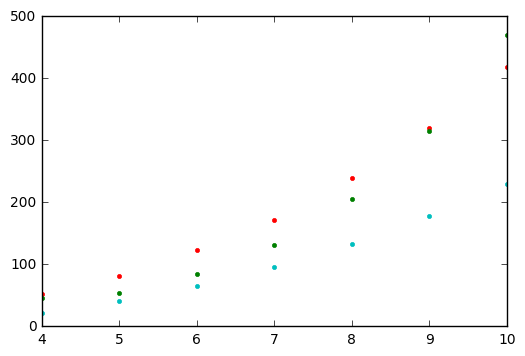

In [78]:
import pylab as pl
%matplotlib inline

pl.clf()
x = np.arange(4,11)
y = np.array(exper_analysis(10))
pl.plot(x, y, 'k.', color ='r')
z = np.array(teoric_analysis(10))
pl.plot(x, z, 'k.', color='c')
w = np.array(time_analysis(10))
pl.plot(x, w, 'k.', color='g')

<h2> Problema 2 - MST </h2>

 Dado un grafo G = (V, E) con n vertices y m aristas. (El grafo podría representar una red telefónica). Cada arista es coloreada azul o roja. Tambien esta dado un parámetro k como parte de la entrada. Proponga un algoritmo que encuentre un árbol de expansión sobre G con exactamente k aristas azules, y exactamente n-k-1 aristas rojas. 

<h4> Algoritmo propuesto </h4>

In [10]:
def punto2(nombre_archivo):
    aristas = []
    azules=[]
    rojos=[]
    destino=[]

    archivo = open(nombre_archivo, "r")
    
    n = int(archivo.readline())
    a=int(archivo.readline())
    r=n-a-1
    k=0
    
    for i in range(n):
        destino.append(0)
    
    for i in archivo.readlines():
        
        linea = i.split(" ")
        
        for j in range (0, len(linea)-1):
            arista = {}
            if linea[j] != "Inf":
                info=linea[j].split("/")
                arista['origen'] = k
                arista['destino'] = j+k
                arista['peso'] = int(info[0])
                arista['color'] = info[1]
                aristas.append(arista)
        k=k+1    
    
    aux=[]
    for i in range(0, len(aristas)):
        for j in range(i, len(aristas)):
            if aristas[i]['peso']>aristas[j]['peso']:
                aux=aristas[i]
                aristas[i]=aristas[j]
                aristas[j]=aux
    
    y=0
    x=0
    distancia=0
    
        
    for ari in aristas:
        if sum(destino) < n-1:
            if ari['color'] == "R" and x < r:
                distancia += ari['peso']
                destino[ari['destino']] = 1
                rojos.append((ari['origen'], ari['destino']))
                x+=1
            if ari['color'] == "B" and y < a:
                distancia += ari['peso']
                destino[ari['destino']] = 1
                azules.append((ari['origen'], ari['destino']))
                y+=1
        
    print (distancia, azules, rojos)
    
    output = open(nombre_archivo.replace("input", "output"), "w")
    
    output.write(str(distancia) + "\n")
    for azul in azules:
        output.write(str(azul))
    output.write("\n")
    for rojo in rojos:
        output.write(str(rojo))

In [11]:
punto2("input_n8_b3_r4")

(22, [(6, 7), (1, 3), (2, 6)], [(1, 5), (1, 2), (5, 7), (0, 2)])


<h4> Análisis del tiempo de ejecución </h4>

In [12]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Número de pasos =", self.steps

        
def acct_punto2(nombre_archivo, acct):
    aristas = []
    azules=[]
    rojos=[]
    destino=[]

    archivo = open(nombre_archivo, "r"); acct.count()
    
    n = int(archivo.readline()); acct.count()
    a=int(archivo.readline()); acct.count()
    r=n-a-1; acct.count()
    k=0
    
    for i in range(n):
        destino.append(0)
    
    for i in archivo.readlines():        
        linea = i.split(" "); acct.count()
        
        for j in range (0, len(linea)-1):
            arista = {}
            if linea[j] != "Inf":
                info=linea[j].split("/"); acct.count()
                arista['origen'] = k; acct.count()
                arista['destino'] = j+k; acct.count()
                arista['peso'] = int(info[0]); acct.count()
                arista['color'] = info[1]; acct.count()
                aristas.append(arista); acct.count()
        k=k+1; acct.count()
    
    aux=[]
    for i in range(0, len(aristas)):
        for j in range(i, len(aristas)):
            if aristas[i]['peso']>aristas[j]['peso']:
                aux=aristas[i]; acct.count()
                aristas[i]=aristas[j]; acct.count()
                aristas[j]=aux; acct.count()
    
    y=0
    x=0
    distancia=0
    
        
    for ari in aristas:
        if sum(destino) < n-1:
            if ari['color'] == "R" and x < r:
                distancia += ari['peso']; acct.count()
                destino[ari['destino']] = 1; acct.count()
                rojos.append((ari['origen'], ari['destino'])); acct.count()
                x+=1; acct.count()
            if ari['color'] == "B" and y < a:
                distancia += ari['peso']; acct.count()
                destino[ari['destino']] = 1; acct.count()
                azules.append((ari['origen'], ari['destino'])); acct.count()
                y+=1; acct.count()
        
    print (distancia, azules, rojos)
    
    output = open(nombre_archivo.replace("input", "output"), "w")
    
    output.write(str(distancia) + "\n")
    for azul in azules:
        output.write(str(azul))
    output.write("\n")
    for rojo in rojos:
        output.write(str(rojo))

In [13]:
acct = Counter()
acct_punto2("input_n8_b3_r4", acct)
acct.print_steps()

(22, [(6, 7), (1, 3), (2, 6)], [(1, 5), (1, 2), (5, 7), (0, 2)])
Número de pasos = 198


<h4> Análisis experimental </h4>
Se utilizará la misma entrada, cambiando el n desde 5 hasta 10.

In [14]:
def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(5, n+1):
        acct.reset()
        acct_punto2("input_n" + str(i) +"_b3" + "_r" + str(i-3-1), acct)
        results.append(acct.steps)
    return results

print exper_analysis(10)

(14, [(3, 4), (0, 1), (0, 2)], [(2, 4)])
(16, [(4, 5), (0, 4), (1, 5)], [(3, 5)])
(17, [(5, 6), (0, 2), (1, 5)], [(0, 4), (0, 1), (4, 6)])
(22, [(6, 7), (1, 3), (2, 6)], [(1, 5), (1, 2), (5, 7), (0, 2)])
(24, [(7, 8), (2, 4), (0, 3)], [(2, 6), (2, 3), (0, 4), (0, 2), (6, 8)])
(26, [(8, 9), (3, 5), (0, 5), (1, 4)], [(3, 7), (1, 5), (3, 4), (0, 3), (1, 3)])
[84, 95, 156, 198, 237, 333]


In [25]:
import time

def time_analysis(n):
    results = []
    for i in range(5, n+1):
        tic = time.clock()
        punto2("input_n" + str(i) +"_b3" + "_r" + str(i-3-1))
        toc = time.clock()
        results.append((toc-tic)*1000000)
    return results

print time_analysis(10)

(14, [(3, 4), (0, 1), (0, 2)], [(2, 4)])
(16, [(4, 5), (0, 4), (1, 5)], [(3, 5)])
(17, [(5, 6), (0, 2), (1, 5)], [(0, 4), (0, 1), (4, 6)])
(22, [(6, 7), (1, 3), (2, 6)], [(1, 5), (1, 2), (5, 7), (0, 2)])
(24, [(7, 8), (2, 4), (0, 3)], [(2, 6), (2, 3), (0, 4), (0, 2), (6, 8)])
(26, [(8, 9), (3, 5), (0, 5), (1, 4)], [(3, 7), (1, 5), (3, 4), (0, 3), (1, 3)])
[1172.000000000395, 248.00000000002598, 225.0000000003638, 210.00000000004349, 227.99999999989495, 248.99999999927758]


In [30]:
import random as rnd
import numpy as np

def teoric_analysis(n):
    results = []
    for i in range(5,n+1):
        l = i*i*np.log(i)
        results.append(l)
    return results

print teoric_analysis(10)

[40.235947810852508, 64.503340892209977, 95.349597303710354, 133.08425866750949, 177.97519076423379, 230.25850929940458]


(14, [(3, 4), (0, 1), (0, 2)], [(2, 4)])
(16, [(4, 5), (0, 4), (1, 5)], [(3, 5)])
(17, [(5, 6), (0, 2), (1, 5)], [(0, 4), (0, 1), (4, 6)])
(22, [(6, 7), (1, 3), (2, 6)], [(1, 5), (1, 2), (5, 7), (0, 2)])
(24, [(7, 8), (2, 4), (0, 3)], [(2, 6), (2, 3), (0, 4), (0, 2), (6, 8)])
(26, [(8, 9), (3, 5), (0, 5), (1, 4)], [(3, 7), (1, 5), (3, 4), (0, 3), (1, 3)])
(14, [(3, 4), (0, 1), (0, 2)], [(2, 4)])
(16, [(4, 5), (0, 4), (1, 5)], [(3, 5)])
(17, [(5, 6), (0, 2), (1, 5)], [(0, 4), (0, 1), (4, 6)])
(22, [(6, 7), (1, 3), (2, 6)], [(1, 5), (1, 2), (5, 7), (0, 2)])
(24, [(7, 8), (2, 4), (0, 3)], [(2, 6), (2, 3), (0, 4), (0, 2), (6, 8)])
(26, [(8, 9), (3, 5), (0, 5), (1, 4)], [(3, 7), (1, 5), (3, 4), (0, 3), (1, 3)])


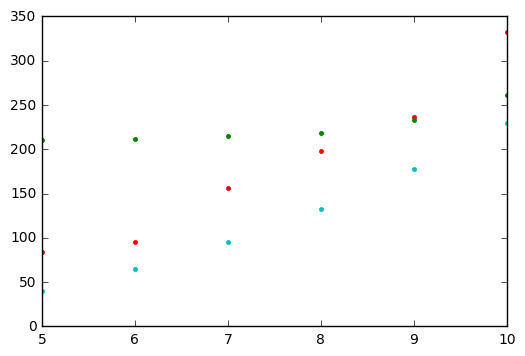

In [31]:
import pylab as pl
%matplotlib inline

pl.clf()
x = np.arange(5,11)
y = np.array(exper_analysis(10))
pl.plot(x, y, 'k.', color ='r')
z = np.array(teoric_analysis(10))
pl.plot(x, z, 'k.', color='c')
w = np.array(time_analysis(10))
pl.plot(x, w, 'k.', color='g')